In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import matplotlib.dates as mdates
import numpy as np

%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("darkgrid")

In [2]:
attacks = pd.read_csv('../data/attacks_cleaned.csv')
attacks.head(10)

,Year,Type,Country,Area,Activity,Sex,Time,Investigator or Source,Month,Fatal
0,2018.0,Boating,USA,California,Board involved activity,F,Random or not clear time references,"R. Collier, GSAF",Jun,N
1,2018.0,Unprovoked,USA,Georgia,Standing,F,Afternoon,"K.McMurray, TrackingSharks.com",Jun,N
2,2018.0,Invalid,USA,Hawaii,Board involved activity,M,Morning,"K.McMurray, TrackingSharks.com",Jun,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Board involved activity,M,NaN,"B. Myatt, GSAF",Jun,N
4,2018.0,Provoked,MEXICO,Colima,Diving activities,M,NaN,A .Kipper,Jun,N
5,2018.0,Unprovoked,AUSTRALIA,New South Wales,Board involved activity,M,NaN,"Daily Telegraph, 6/4/2018",Jun,N
6,2018.0,Unprovoked,BRAZIL,Pernambuco,Swimming related,M,Afternoon,"Diario de Pernambuco, 6/4/2018",Jun,Y
7,2018.0,Unprovoked,USA,Florida,Fishing related,M,NaN,"K. McMurray, TrackingSharks.com",May,N
8,2018.0,Unprovoked,USA,Florida,Beach activities,M,Afternoon,"K.McMurray, TrackingSharks.com",May,N
9,2018.0,Unprovoked,USA,Florida,Standing,M,Afternoon,"K. McMurray, Tracking Sharks.com",May,N


# First of all we are going to represent a boxplot with the top 5 countries by attack report


In [3]:
attacks["Country"].value_counts().head(7)

USA                 1986
AUSTRALIA           1076
SOUTH AFRICA         470
NEW ZEALAND          102
PAPUA NEW GUINEA     100
BRAZIL                85
BAHAMAS               82
Name: Country, dtype: int64

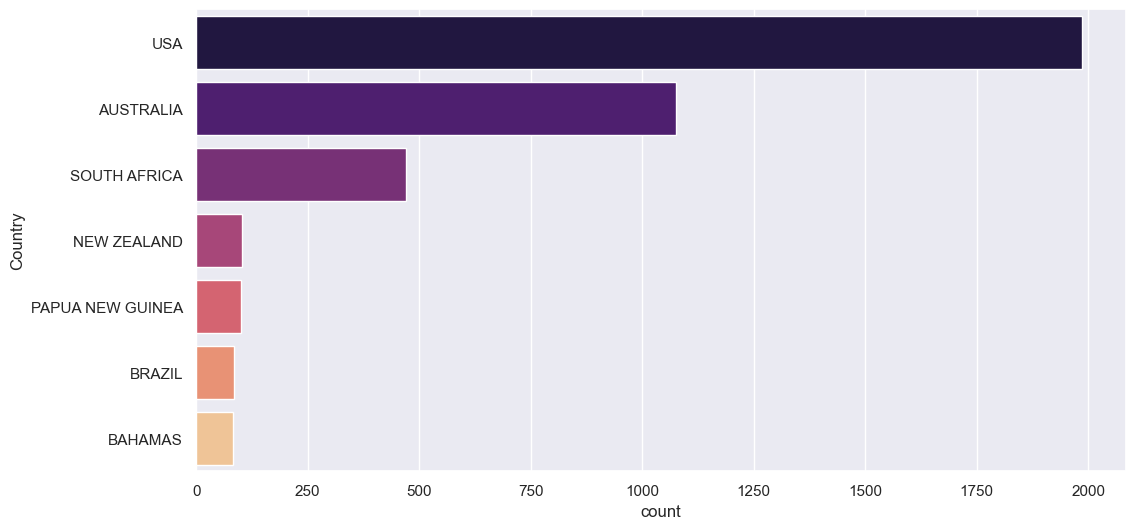

In [4]:
plot_1=sns.countplot(y= attacks.Country, order=attacks.Country.value_counts().iloc[:7].index, palette = "magma")
plot_1.figure.savefig("../images/Top7_countries.jpg", dpi=1000, bbox_inches = "tight")

<!-- # Relationship between activity and number of attacks -->

# Number of reports along the years

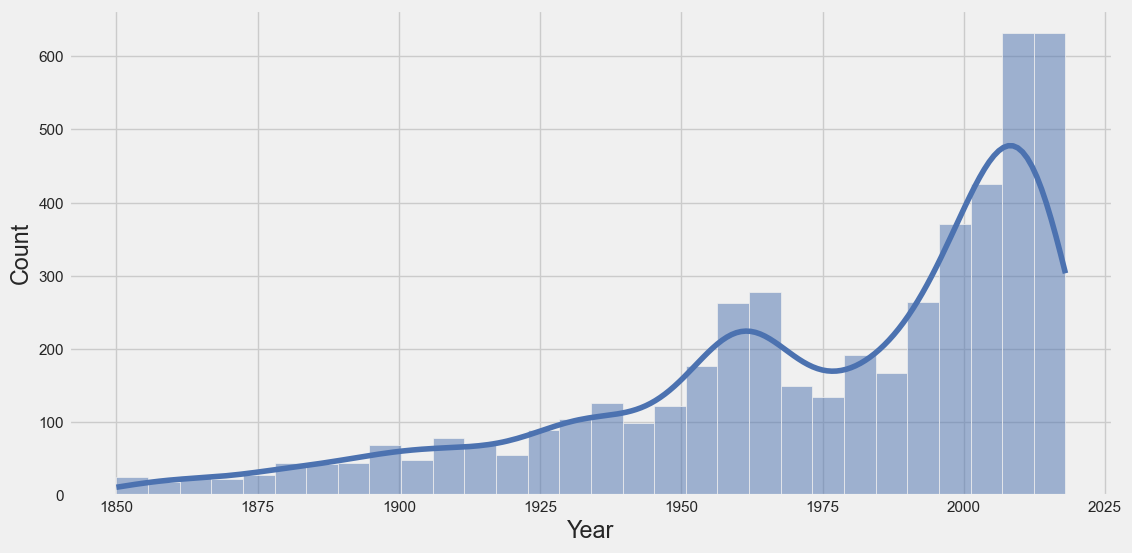

In [5]:
df = attacks[(attacks["Year"]>=1850)]

plt.style.use('fivethirtyeight')
plot_2 = sns.histplot(x=df.Year, bins=30, kde=True)
plot_2.figure.savefig("../images/reports_along_years.jpg", dpi=1000, bbox_inches = "tight")

# Relationship between month and number of reports


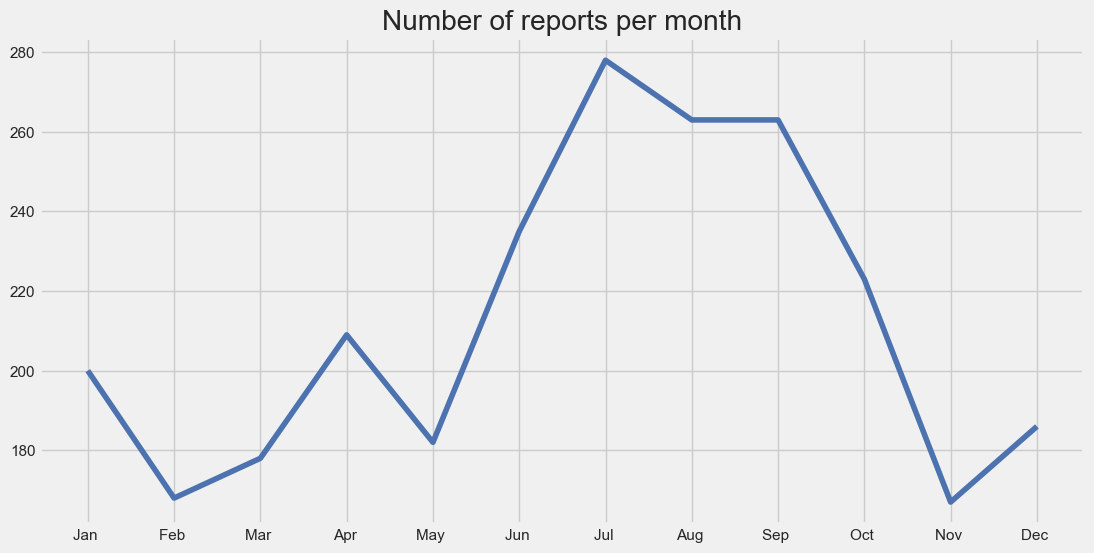

In [6]:
ordered_months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", 
      "Jul ", "Aug ", "Sep ", "Oct ", "Nov ", "Dec "]

attacks['Month']=attacks['Month'].dropna(axis = 0).apply(lambda x:ordered_months.index(x))
attacks = attacks.sort_values('Month')

a = attacks.dropna(axis = 0).groupby("Month").indices.keys()
b = attacks.dropna(axis = 0).groupby("Month").size()

plt.style.use('fivethirtyeight')
plt.xticks(np.linspace(0, 11, 12), ordered_months)
plt.title("Number of reports per month", loc = 'center')
plt.rcParams["figure.figsize"] = (22,6)
plot_3 = plt.plot(a, b, "b")

# Relationship between hour and number of attacks



In [8]:
attacks["Time"].value_counts()

Afternoon                              1555
Morning                                 951
Random or not clear time references     284
Nightime                                115
Name: Time, dtype: int64

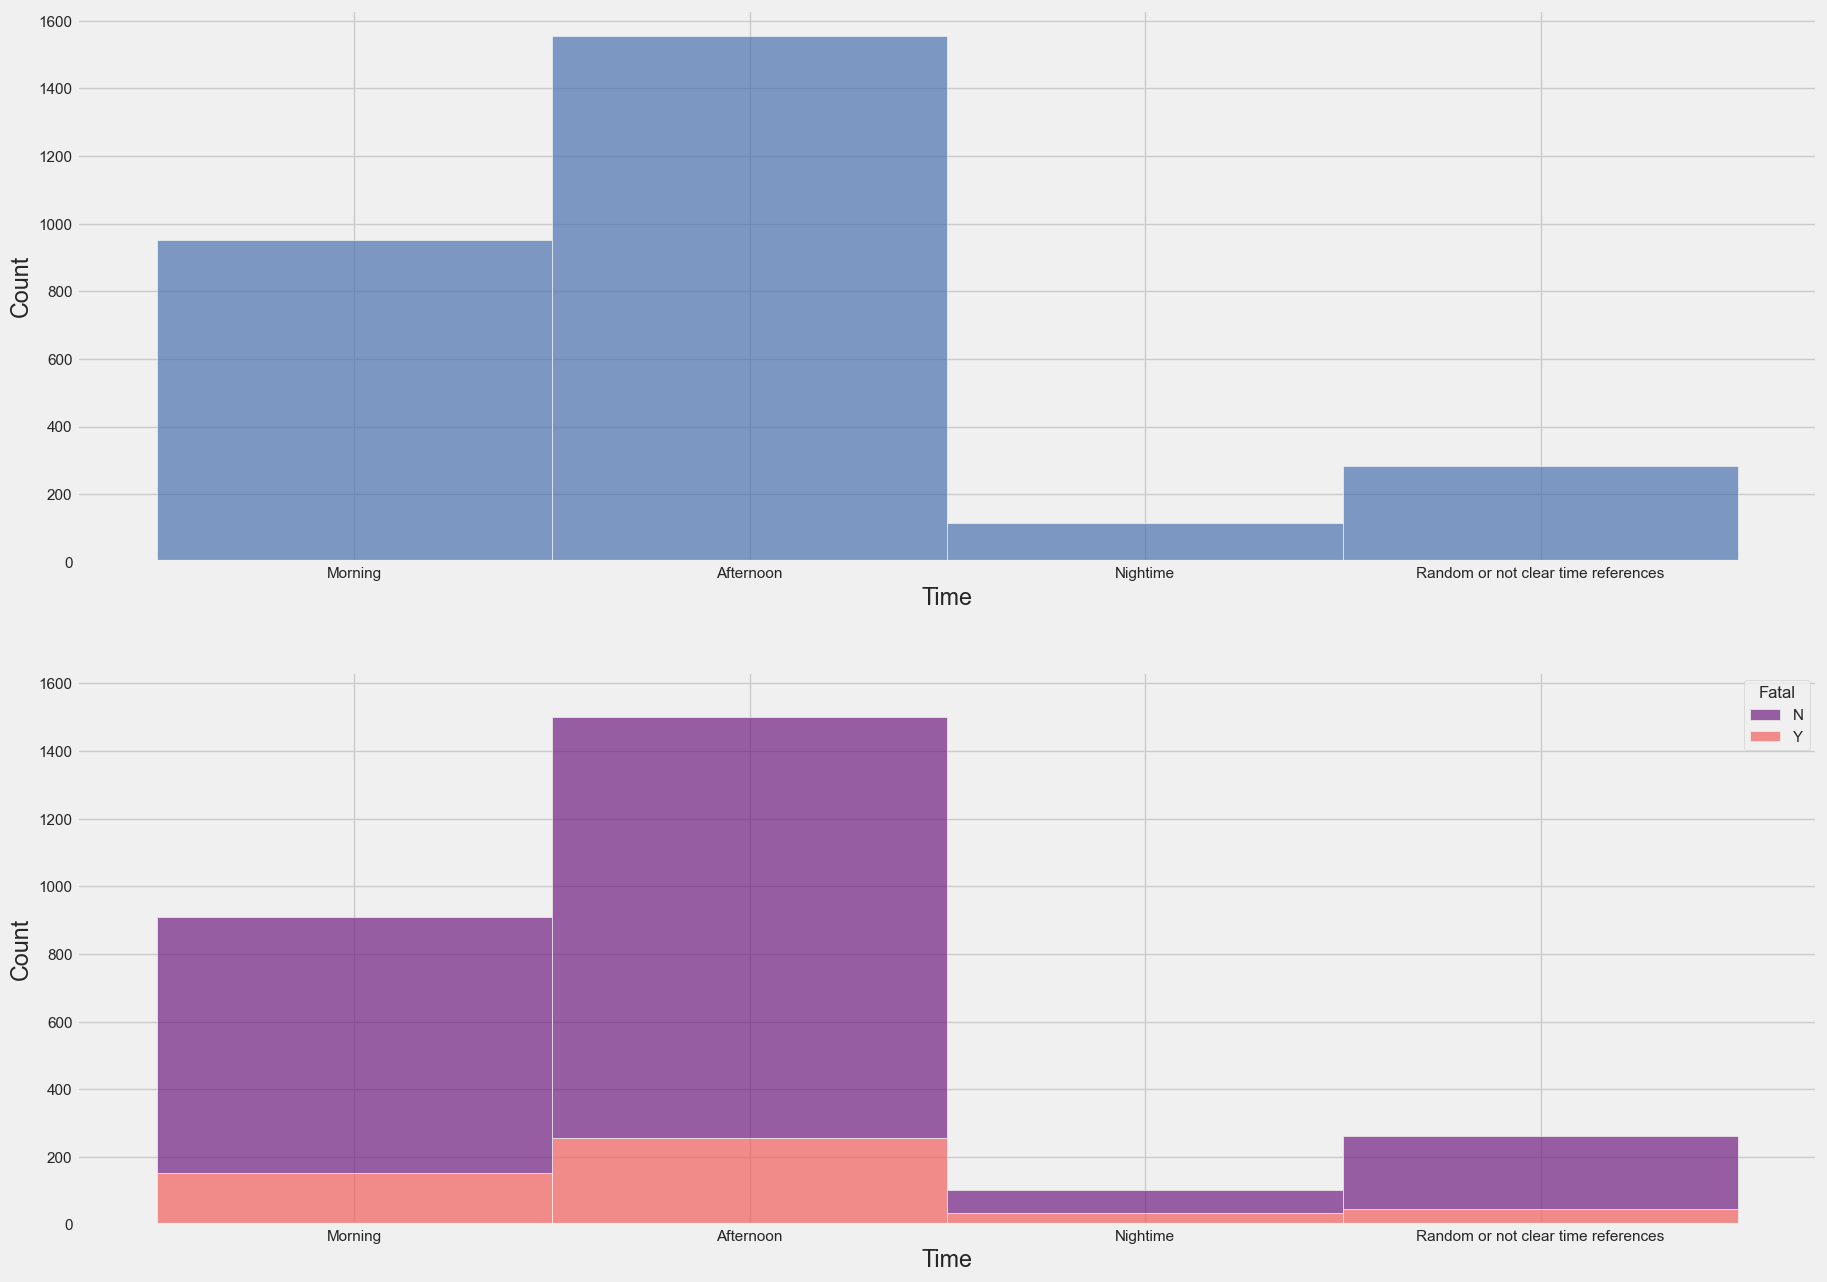

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,15), sharey = True)

plot_4_1 = sns.histplot(data=attacks, x="Time", ax=axs[0], palette="magma", alpha = 0.7)
# fig.figure.savefig("../images/plot_4_1.jpg", dpi=1000)
plot_4_2 =sns.histplot(data=attacks, x="Time", multiple="stack", hue= "Fatal", palette="magma", alpha = 0.7, ax=axs[1])
# fig.figure.savefig("../images/plot_4_2.jpg", dpi=1000)

fig.figure.savefig("../images/hours_number_attacks.jpg", dpi=1000)

# Relationship between activity, number of attacks and fatality

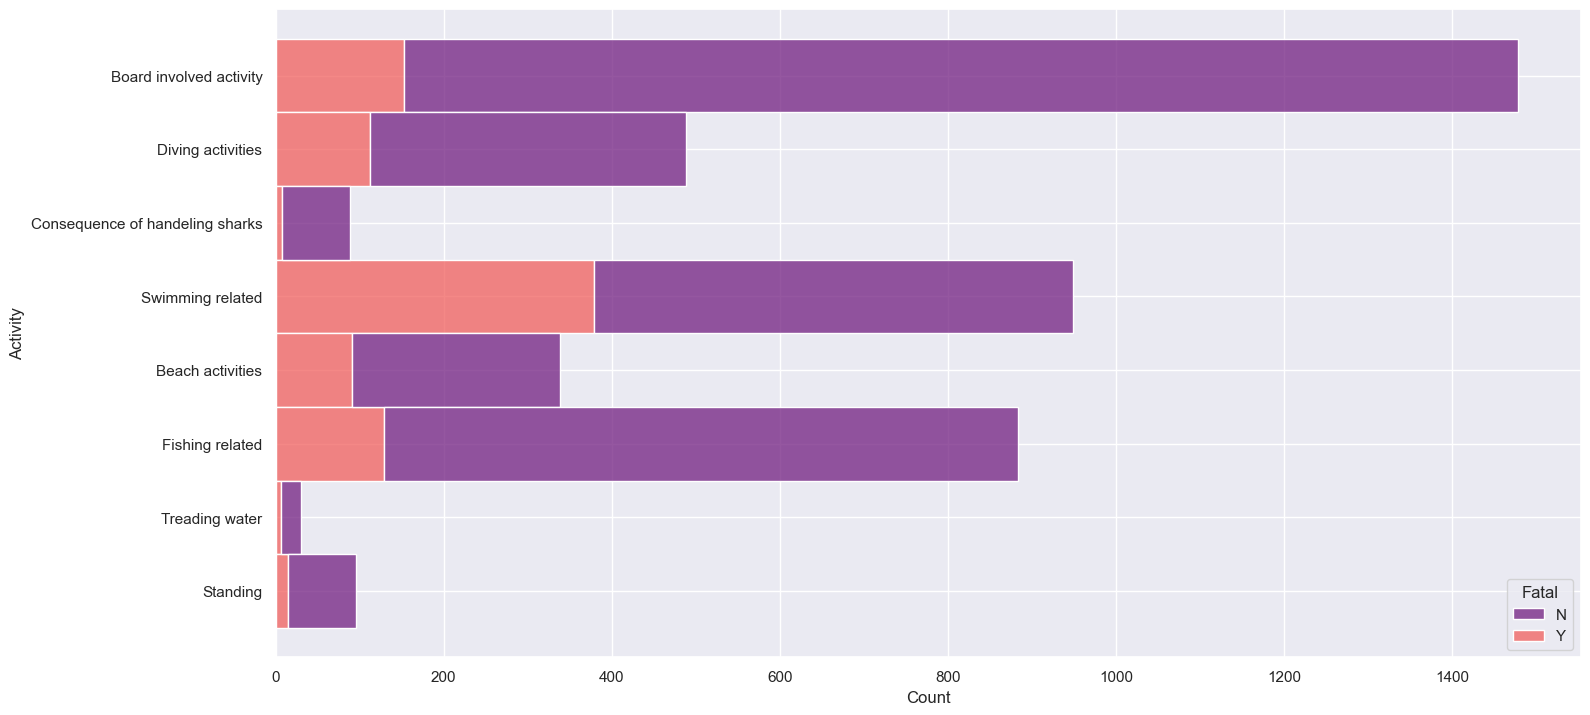

In [54]:
c = dict(attacks["Activity"].value_counts().head(8))
df = attacks.loc[attacks["Activity"].isin(c.keys())]

sns.set(rc = {'figure.figsize':(15,8)})
plot_5 = sns.histplot(data=df, 
                      y="Activity",  
                      stat = "count", 
                      hue= "Fatal", 
                      multiple = "stack",
                      palette="magma",
                      binwidth = 100)

# plot_5.figure.savefig("../images/activity_attacks_fatality.jpg", dpi=1000)